# MET DATA ANALYSIS
#### Reid Holben and Gabriel Barela

#### Loading the dataset from GitHub using pandas.
* Imports the pandas library: 
    * This is essential for data manipulation and analysis in Python.
* Defines the URL: 
    * This is the link to the raw dataset hosted on GitHub.
* Loads the dataset: 
    * The pd.read_csv(url) function reads the CSV file from the provided URL and loads it into a pandas DataFrame called data.

In [1]:
import pandas as pd

# URL of the raw dataset on GitHub
url = 'https://github.com/metmuseum/openaccess/raw/refs/heads/master/MetObjects.csv'

# Load the dataset
data = pd.read_csv(url)

C:\Users\gbare\AppData\Local\Temp\ipykernel_33412\3814981754.py:7: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


#### Analyze missing data in the DataFrame and combine it with the data types of each feature.
1. Calculate Missing Data:
* nullCounts = data.isnull().sum(): Counts the number of missing values for each feature.
* totalInstances = len(data): Gets the total number of instances in the DataFrame.
* nullPercentages = (nullCounts / totalInstances) * 100: Calculates the percentage of missing values for each feature.
2. Create a List of Tuples:
* A loop iterates over the features, counts, and percentages, appending them to nullData as tuples.
3. Create a DataFrame for Missing Data:
* nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage']): Converts the list of tuples into a DataFrame.
* nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False): Sorts the DataFrame by the percentage of missing values in descending order.
4. Get Data Types:
* data_types = data.dtypes: Gets the data types of each feature.
* data_types_df = data_types.reset_index(): Converts the Series to a DataFrame.
* data_types_df.columns = ['Feature', 'Data Type']: Renames the columns for readability.
5. Merge DataFrames:
* combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature'): Merges the missing data DataFrame with the data types DataFrame on the 'Feature' column.
* Finally, combined_df will contain the features, their missing value counts, percentages, and data types.

In [2]:
nullData = []
nullCounts = data.isnull().sum()
totalInstances = len(data)
nullPercentages = (nullCounts / totalInstances) * 100

for feature, count, percentage in zip(nullCounts.index, nullCounts, nullPercentages):
    nullData.append((feature, count, round(percentage, 2)))

nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage'])

# Sort the DataFrame by 'Percentage' in decending order
nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False)

# Get the data types of each feature in the DataFrame
data_types = data.dtypes

# Convert the data types to a DataFrame for better readability
data_types_df = data_types.reset_index()
data_types_df.columns = ['Feature', 'Data Type']

# Merge the null data and data types into a single DataFrame
combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature')

combined_df

,Feature,Count,Percentage,Data Type
0,Metadata Date,484956,100.00,float64
1,River,482864,99.57,object
2,State,482335,99.46,object
3,Locus,477438,98.45,object
4,County,476397,98.24,object
5,Reign,473720,97.68,object
6,Locale,469217,96.75,object
7,Excavation,468385,96.58,object
8,Subregion,462813,95.43,object
9,Dynasty,461755,95.22,object


#### Code set up to keep only the features relevant for analyzing accession and object dates.
1. Define Features to Keep:
* features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']: 
    * Specifies the columns you want to retain for your analysis.
2. Drop Irrelevant Features:
* cleaned_data = data[features_to_keep]: 
    * Creates a new DataFrame cleaned_data that includes only the specified columns.
3. Convert 'AccessionYear' to Numeric:
* cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce'): 
    * Converts the 'AccessionYear' column to numeric, coercing any errors to NaN.
4. Drop Rows with NaN Values in 'AccessionYear':
* cleaned_data = cleaned_data.dropna(subset=['AccessionYear']): 
    * Drops rows where 'AccessionYear' is NaN.
5. Display the First Few Rows:
* .head(): 
    * Displays the first five rows of the cleaned_data DataFrame.

In [3]:
# List of features to keep for analysis of accession and object dates
features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']

# Drop irrelevant features
cleaned_data = data[features_to_keep]

# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce')

# Drop rows with NaN values in 'AccessionYear'
cleaned_data = cleaned_data.dropna(subset=['AccessionYear'])

cleaned_data.head()

,AccessionYear,Object Begin Date,Object End Date,Department,Artist Begin Date,Artist End Date,Dimensions,Object Date
0,1979.0,1853,1853,The American Wing,1794,1869,Dimensions unavailable,1853
1,1980.0,1901,1901,The American Wing,1785,1844,Dimensions unavailable,1901
2,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
3,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
4,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27


## Plotting the Distribution of Accession Dates by Department

To visualize the distribution of accession dates across different departments.

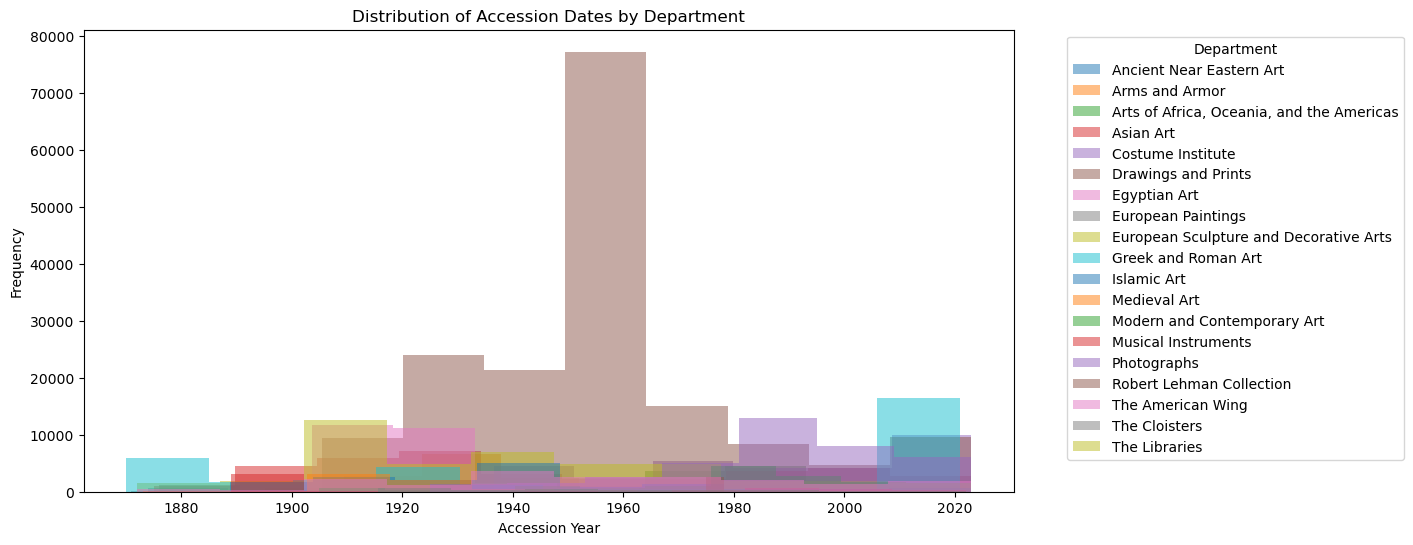

In [5]:
import matplotlib.pyplot as plt

# Create a Figure
plt.figure(figsize=(12, 6))

# Group and Plot Data
cleaned_data.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Accession Dates by Department')
plt.xlabel('Accession Year')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

## Plotting the Distribution of Object Begin Dates by Department

To visualize the distribution of object begin dates across different departments.

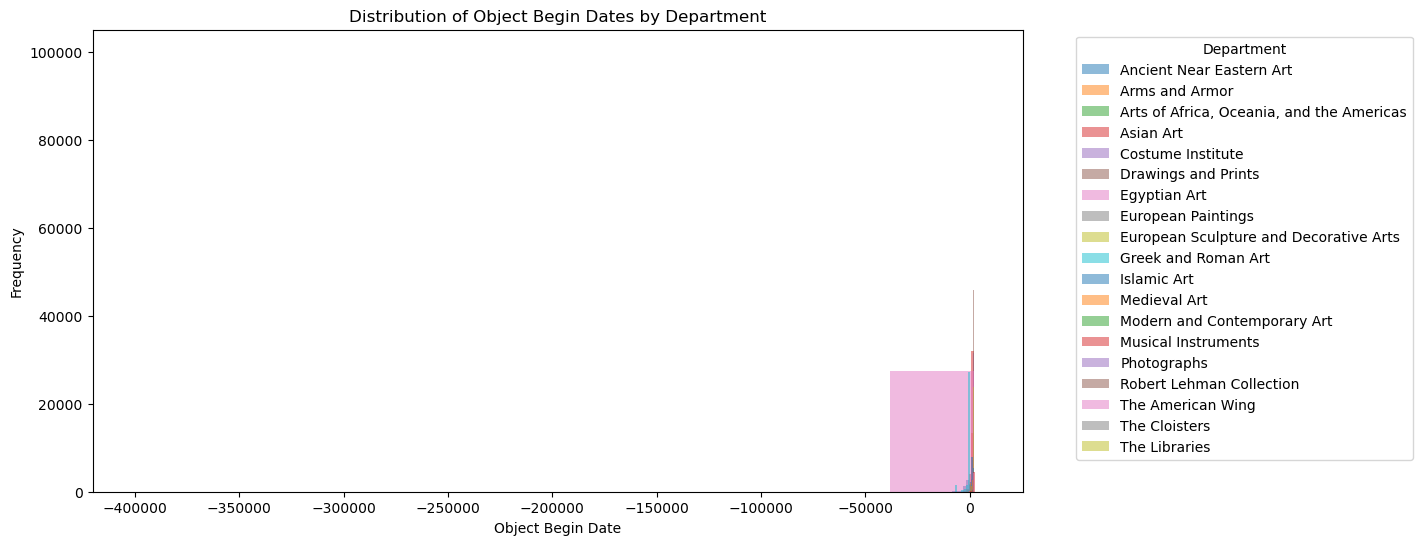

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of object begin dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Object Begin Dates by Department')
plt.xlabel('Object Begin Date')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

## Plotting the Distribution of Object End Dates by Department

To visualize the distribution of object end dates across different departments.

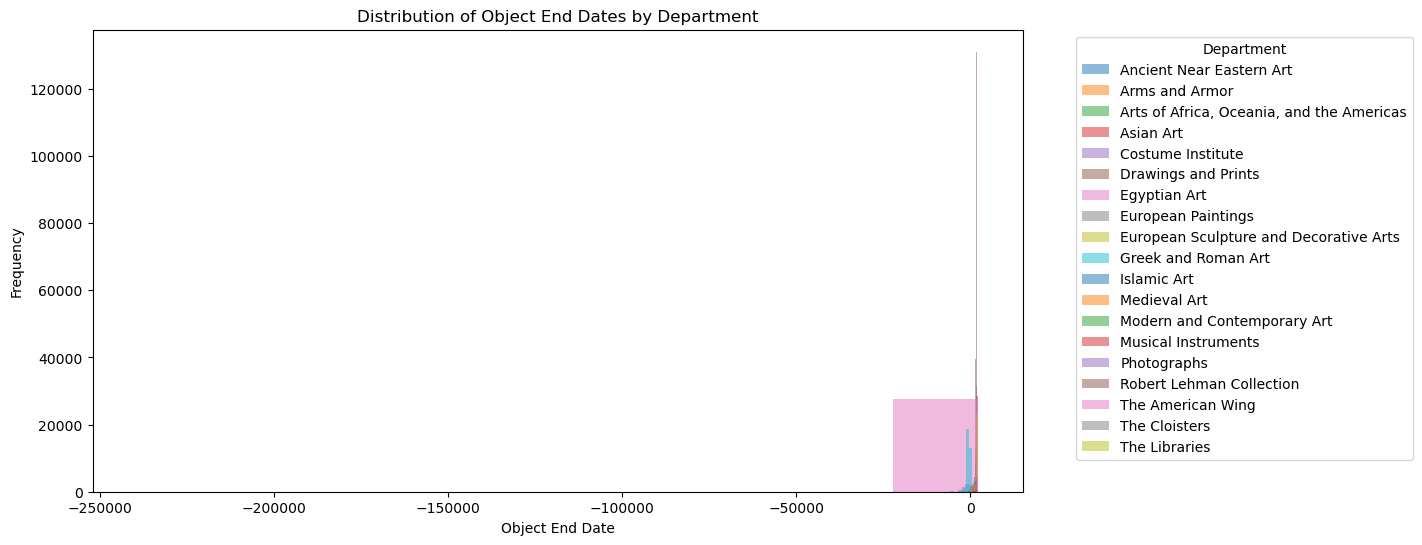

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of object end dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Object End Dates by Department')
plt.xlabel('Object End Date')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()